In [1]:
import numpy as np
import pandas as pd 

In [2]:
import pandas as pd # read the csv
import re # regex to detect username, url, html entity 
import nltk # to use word tokenize (split the sentence into words)
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K

In [3]:
data_df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

data_df.head() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2685362214.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data_df["DEATH_EVENT"], palette=cols)


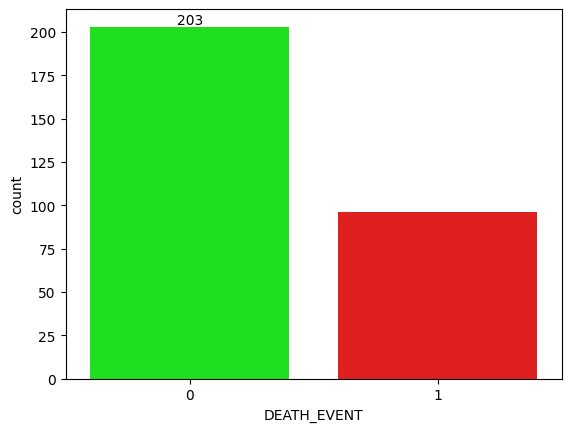

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["#00FF00", "#FF0000"]
ax = sns.countplot(x=data_df["DEATH_EVENT"], palette=cols)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: >

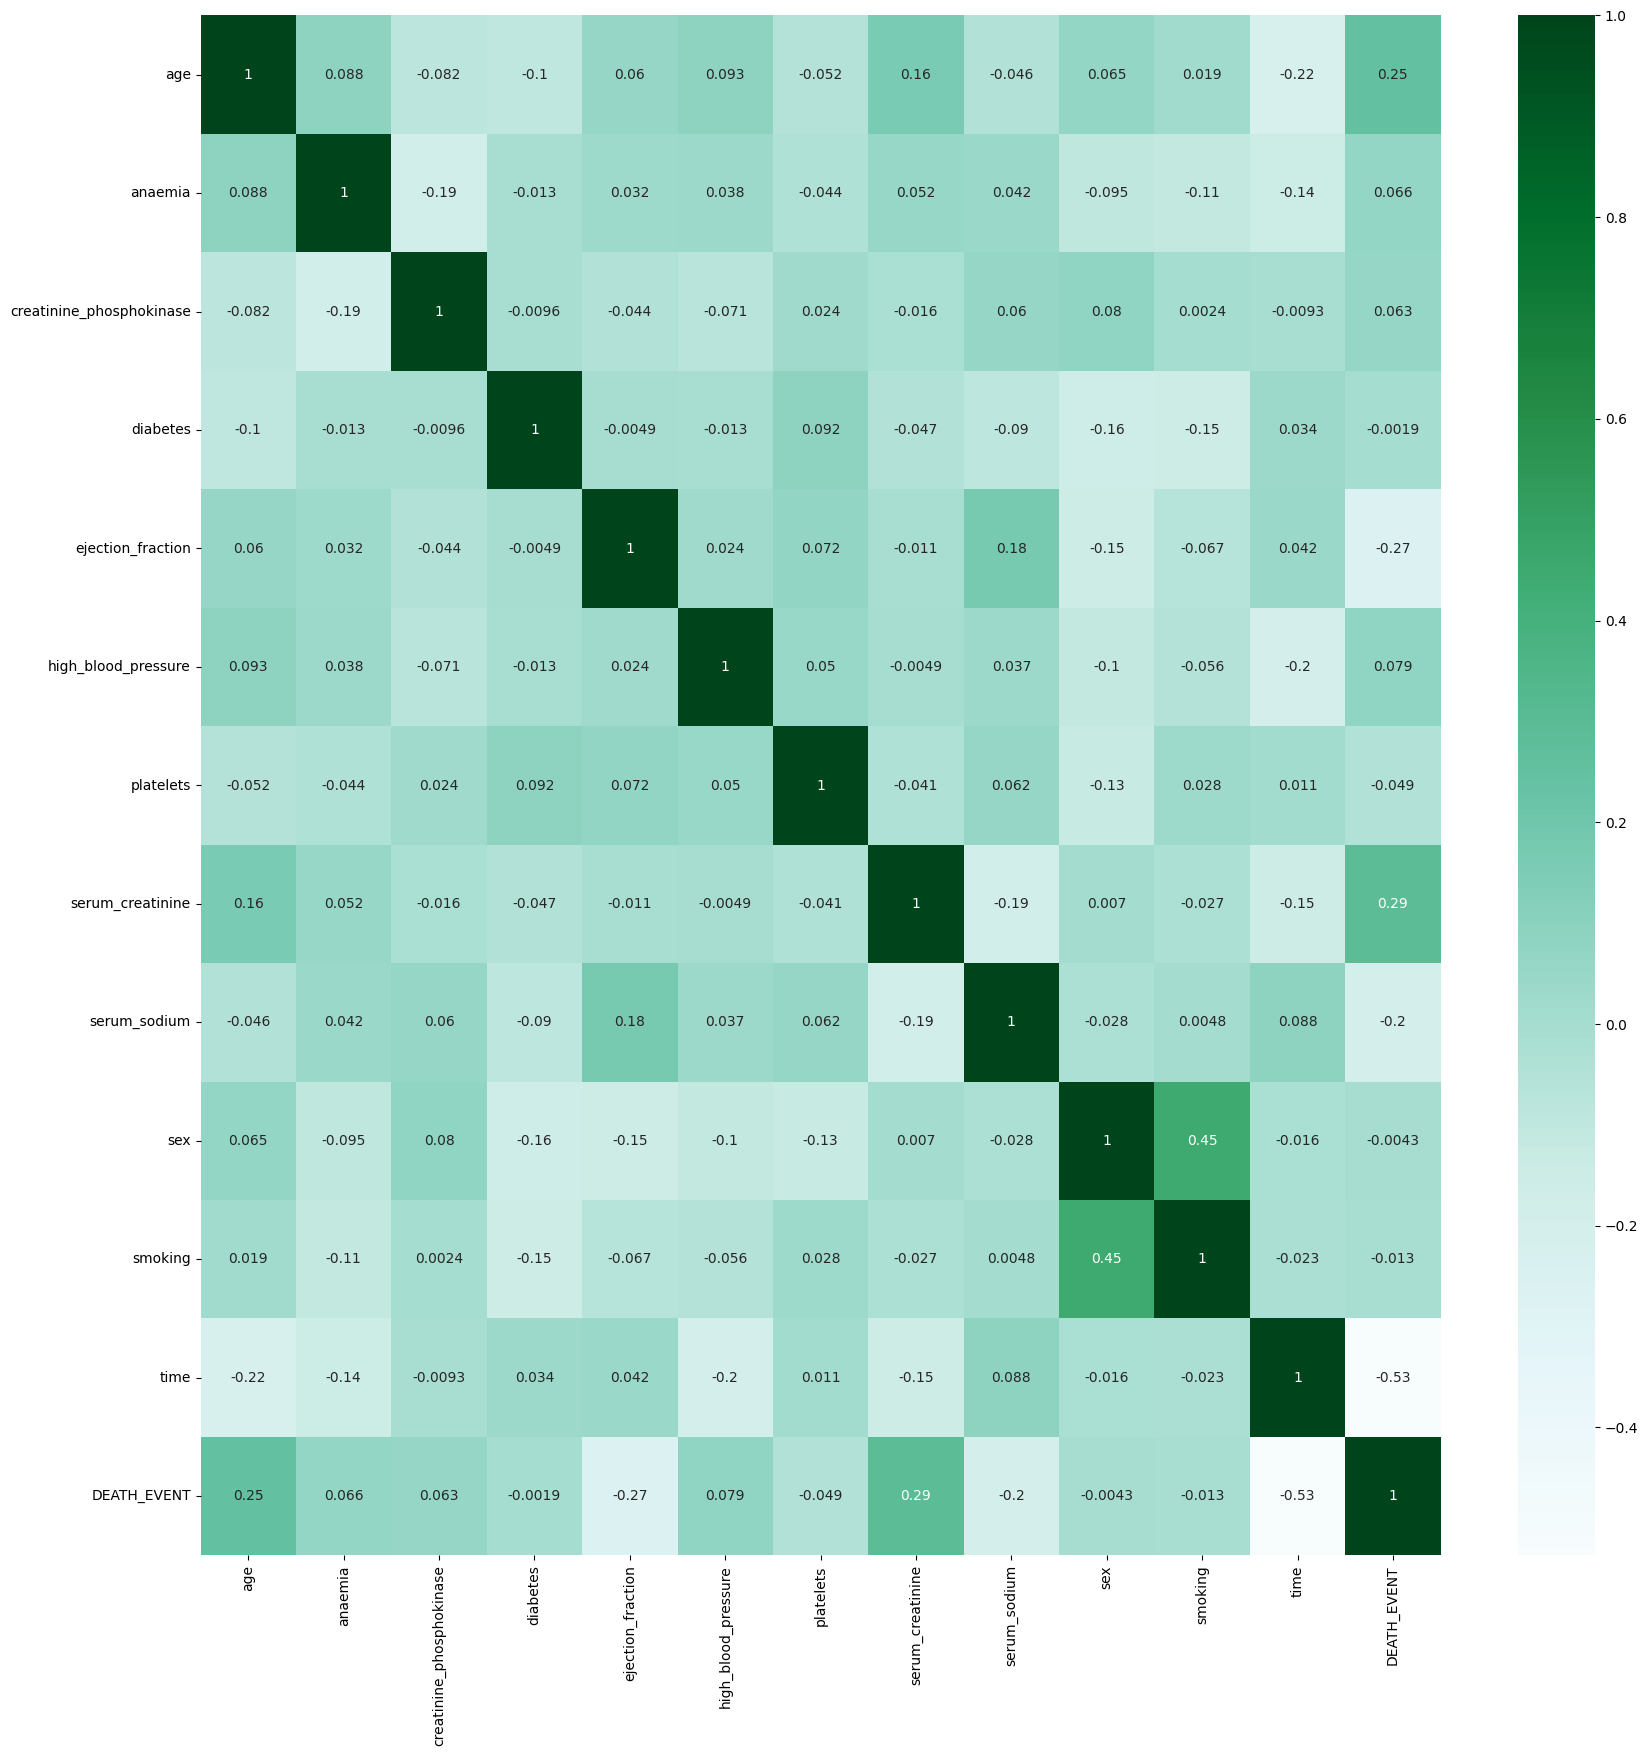

In [8]:
plt.subplots(figsize=(20,20))
sns.heatmap(data_df.corr(), cmap="BuGn", annot=True)

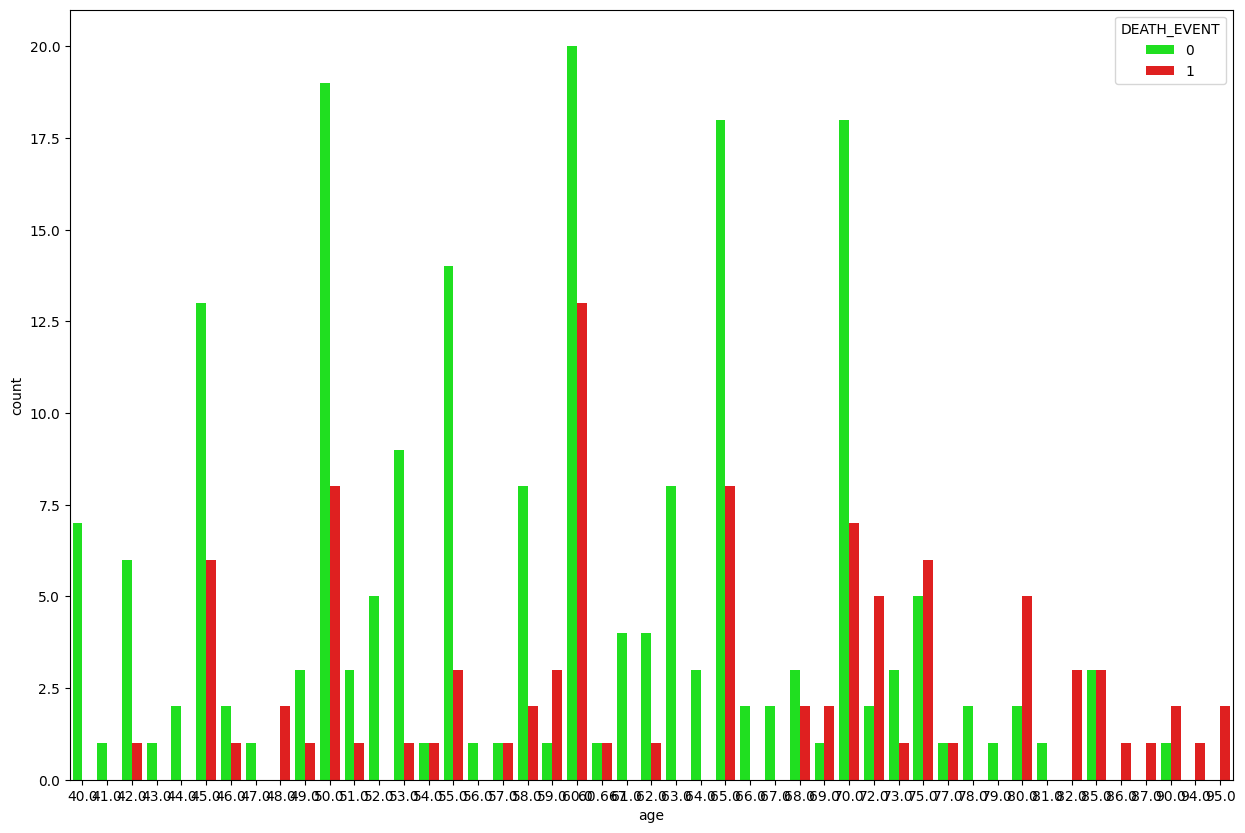

In [9]:
plt.figure(figsize=(15,10))
days_of_week = sns.countplot(x=data_df['age'], data=data_df, hue="DEATH_EVENT", palette = cols)

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)


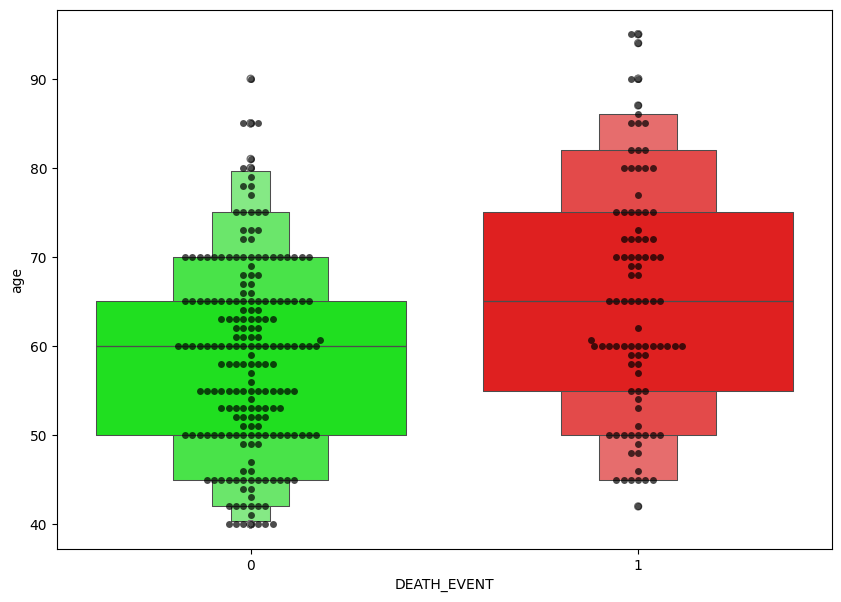

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)
C:\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


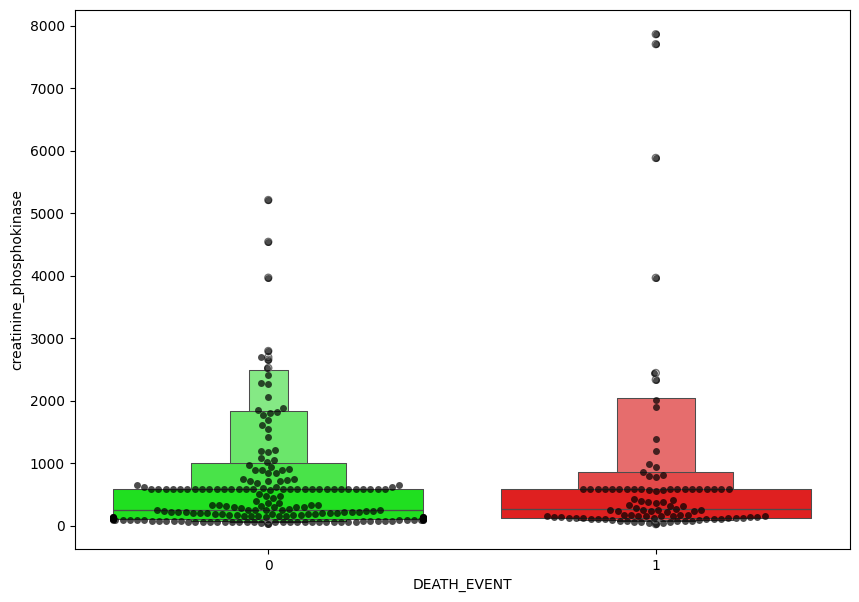

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)


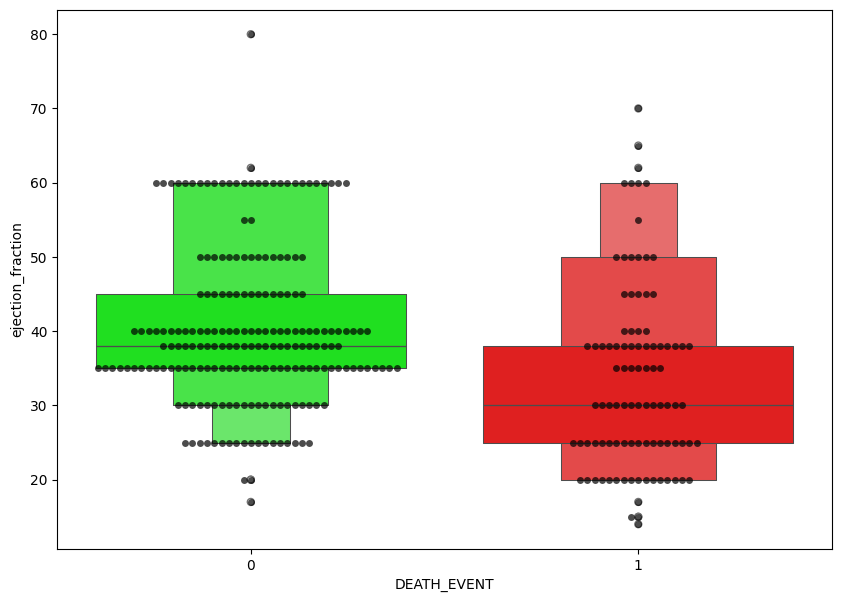

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)


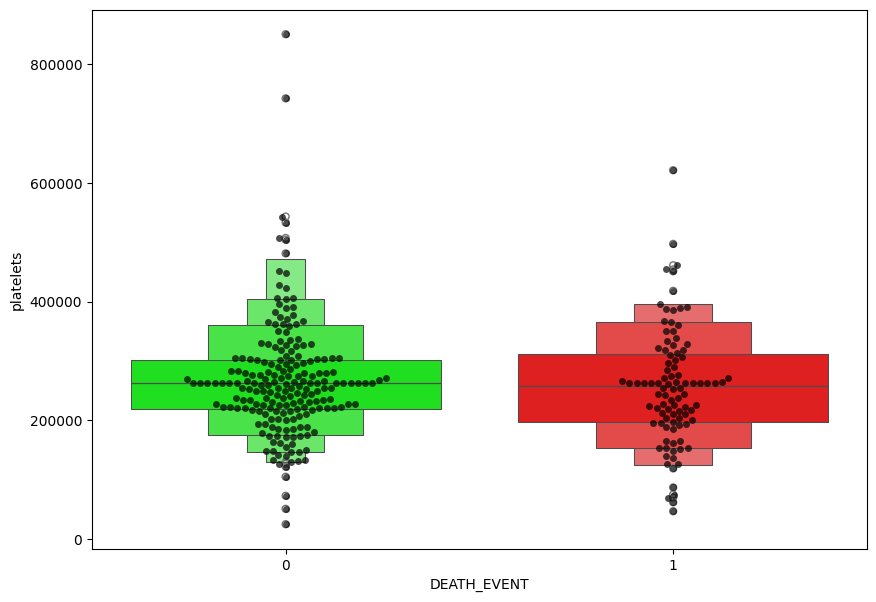

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)
C:\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


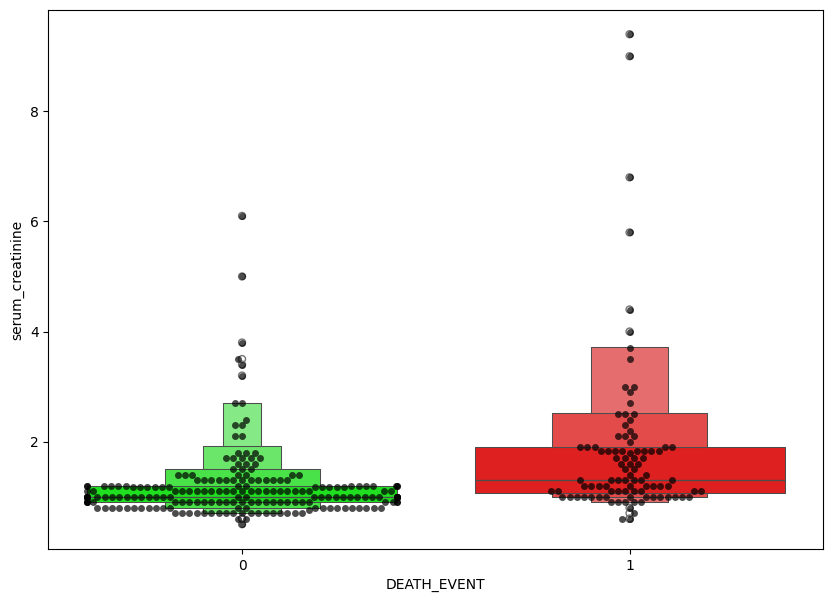

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)


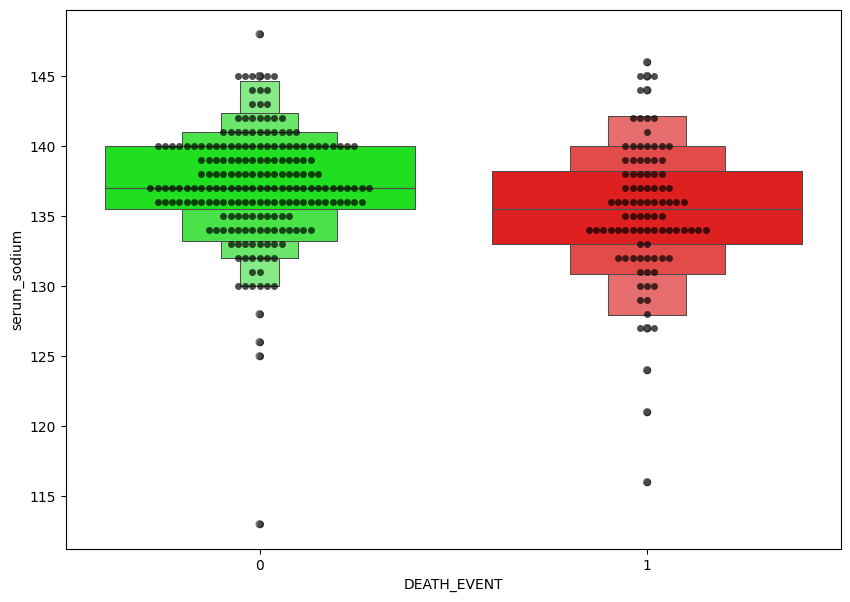

C:\Users\kjaye\AppData\Local\Temp\ipykernel_20388\2486839525.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)


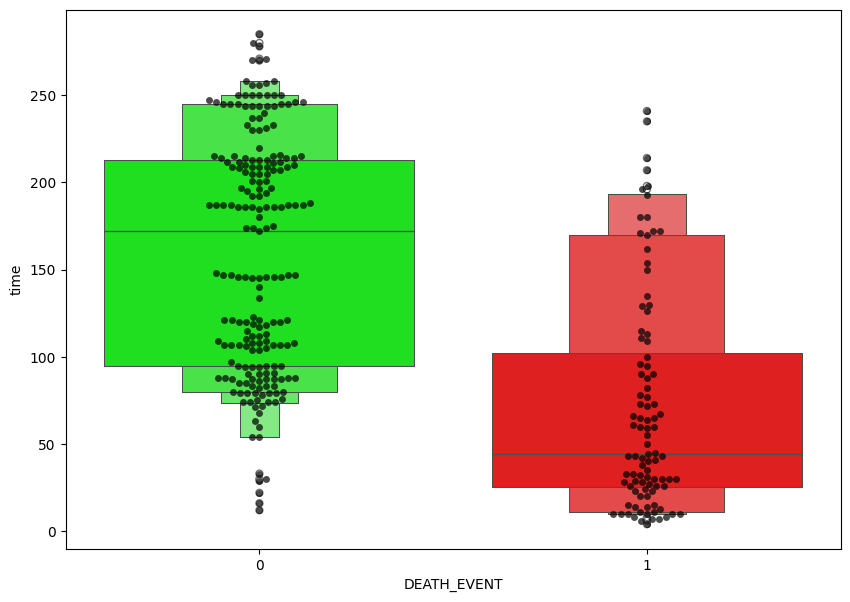

In [10]:
feature = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
for i in feature:
    plt.figure(figsize=(10,7))
    sns.swarmplot(x=data_df["DEATH_EVENT"], y = data_df[i], color = "black", alpha = 0.7)
    sns.boxenplot(x=data_df["DEATH_EVENT"], y = data_df[i], palette=cols)
    plt.show()

In [11]:
X = data_df.drop(["DEATH_EVENT"], axis = 1)
y = data_df["DEATH_EVENT"]


In [12]:
import pandas as pd
from sklearn import preprocessing
col_name = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled = s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_name)

In [13]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


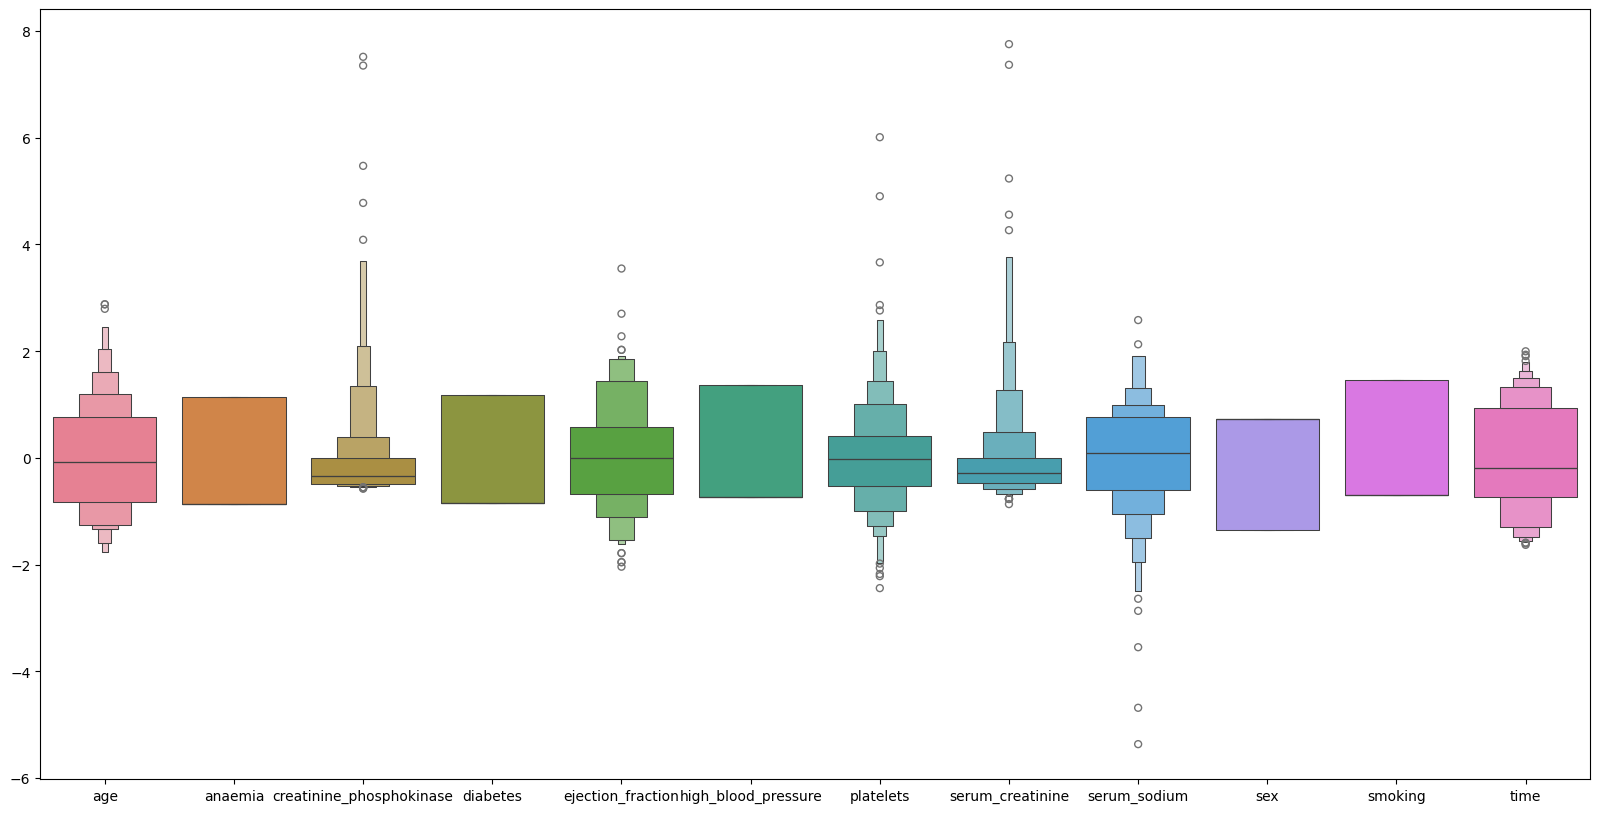

In [14]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [17]:
from sklearn import svm

# model building
model1 = svm.SVC()


In [18]:
model1.fit(X_train, y_train)

SVC()

In [20]:
y_pred = model1.predict(X_test)

In [21]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [22]:
y_test

109    0
127    0
208    0
196    0
241    0
      ..
72     1
63     1
188    0
242    0
98     0
Name: DEATH_EVENT, Length: 90, dtype: int64

In [23]:
y_train

275    0
30     1
33     0
168    0
282    0
      ..
173    0
289    0
171    0
246    1
293    0
Name: DEATH_EVENT, Length: 209, dtype: int64

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        61
           1       0.71      0.59      0.64        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.78        90



In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, patience=20, restore_best_weights=True
)

model = Sequential()
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=12))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 425 (1.66 KB)
Trainable params: 425 (1.6

In [33]:
history = model.fit(X_train, y_train, batch_size = 25, epochs=100, callbacks=[early_stopping], validation_split=0.25)

Epoch 1/100
7/7 [==============================] - 1s 41ms/step - loss: 0.6927 - accuracy: 0.5897 - val_loss: 0.6919 - val_accuracy: 0.6981
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6916 - accuracy: 0.6731 - val_loss: 0.6906 - val_accuracy: 0.6981
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6905 - accuracy: 0.6731 - val_loss: 0.6893 - val_accuracy: 0.6981
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.6731 - val_loss: 0.6881 - val_accuracy: 0.6981
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.6731 - val_loss: 0.6867 - val_accuracy: 0.6981
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.6731 - val_loss: 0.6853 - val_accuracy: 0.6981
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6857 - accuracy: 0.6731 - val_loss: 0.6839 - val_accuracy: 0.6981
Epoch 8/100
7/7 [========

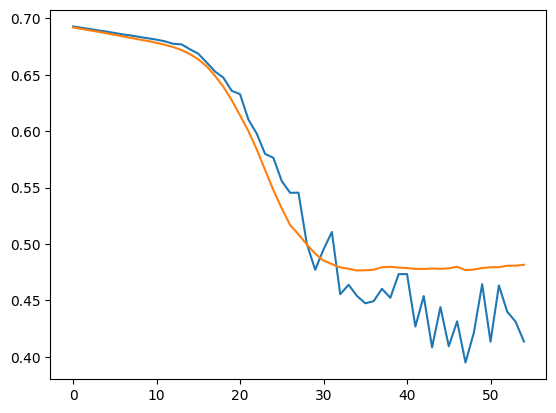

In [34]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], label = "Training loss")
plt.plot(history_df.loc[:, ['val_loss']], label = "validation loss")
plt.show()

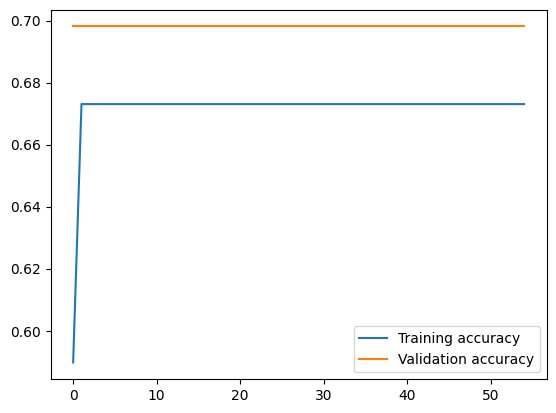

In [36]:
plt.plot(history_df.loc[:,['accuracy']], label = "Training accuracy")
plt.plot(history_df.loc[:,['val_accuracy']], label = "Validation accuracy")
plt.legend()
plt.show()

In [37]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 0s/step


In [39]:
y_pred = (y_pred > 0.5)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90



C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
